Analyzing Swiss Rail Plan

**Import library**

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**import csv file and show first few line of the file**

In [33]:
stops_df = pd.read_csv('stops.csv')
stops_df.head()

,﻿stop_id,stop_name,stop_lat,stop_lon,stop_url,location_type,parent_station
0,1101064,"Malpensa Aeroporto, terminal 1",45.627214,8.711116,NaN,NaN,NaN
1,8014422,Efringen-Kirchen,47.655618,7.563914,NaN,NaN,NaN
2,8014423,Eimeldingen,47.627946,7.595606,NaN,NaN,NaN
3,8014424,Haltingen,47.612839,7.611677,NaN,NaN,NaN
4,8014428,Weil am Rhein,47.593965,7.608416,NaN,NaN,NaN


In [45]:
stops_df.tail()

,﻿stop_id,stop_name,stop_lat,stop_lon,stop_url,location_type,parent_station
22706,8771861,Morteau,47.053726,6.604872,NaN,NaN,NaN
22707,8774500,Bellegarde (Ain),46.110920,5.825970,NaN,NaN,NaN
22708,8774538,Pougny-Chancy,46.146082,5.961157,NaN,NaN,NaN
22709,8774687,Vallorcine (F),46.033405,6.933988,NaN,NaN,NaN
22710,8776100,Valence-Ville,44.927652,4.893474,NaN,NaN,NaN


**Try to import basemap**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%matplotlib inline
sns.set(style="white", context="talk")

In [47]:
stops_df.shape

(22711, 7)

In [48]:
stops_df.notnull().sum()

﻿stop_id          22711
stop_name         22711
stop_lat          22711
stop_lon          22711
stop_url              0
location_type         0
parent_station        0
dtype: int64

In [49]:
stops_df.notnull().sum() * 100/stops_df.shape[0]

﻿stop_id          100.0
stop_name         100.0
stop_lat          100.0
stop_lon          100.0
stop_url            0.0
location_type       0.0
parent_station      0.0
dtype: float64

In [50]:
len(stops_df.stop_name.unique())

22711

In [40]:
stops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22711 entries, 0 to 22710
Data columns (total 7 columns):
﻿stop_id          22711 non-null int64
stop_name         22711 non-null object
stop_lat          22711 non-null float64
stop_lon          22711 non-null float64
stop_url          0 non-null float64
location_type     0 non-null float64
parent_station    0 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [39]:
stops_df[['stop_name', 'stop_lat', 'stop_lon']][:10]

,stop_name,stop_lat,stop_lon
0,"Malpensa Aeroporto, terminal 1",45.627214,8.711116
1,Efringen-Kirchen,47.655618,7.563914
2,Eimeldingen,47.627946,7.595606
3,Haltingen,47.612839,7.611677
4,Weil am Rhein,47.593965,7.608416
5,Weil am Rhein-Ost,47.590633,7.634782
6,Riehen,47.583157,7.652011
7,Lörrach-Stetten,47.601416,7.659036
8,Lörrach Hbf,47.614050,7.665423
9,Lörrach Haagen/Messe,47.633231,7.680892


In [6]:
agency_df = pd.read_csv('agency.csv')
agency_df.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone
0,1,SBB,http://www.sbb.ch/,Europe/Berlin,DE,900300300


In [8]:
calendar_df = pd.read_csv('calendar.csv')
calendar_df.head()

,﻿service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,TA+b0h09,1,1,1,1,1,0,0,20161129,20161210
1,TA+b0h0b,1,1,1,1,1,1,1,20161129,20161210
2,TA+b0h0d,1,1,1,1,1,1,1,20161129,20161210
3,TA+b0h0e,1,1,1,1,1,1,1,20161129,20161210
4,TA+b0h0f,1,1,1,1,1,1,1,20161129,20161210


In [70]:
calendar_df = pd.read_csv('calendar.csv')
calendar_df.tail()

,﻿service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
3583,TA+b05c0,1,1,1,1,1,1,0,20161129,20161210
3584,TA+b0hvg,0,0,0,0,0,1,1,20161129,20161210
3585,TA+b0g2e,0,0,0,0,0,1,1,20161129,20161210
3586,TA+b02or,1,1,1,1,1,1,1,20161129,20161210
3587,TA+b0bag,1,1,1,1,1,1,1,20161129,20161210


In [106]:
from pandas import Series, DataFrame

In [193]:
a =calendar_df['monday'].value_counts()[:1]
a.index=['MON']

In [176]:
b =calendar_df['tuesday'].value_counts()[:1]
b.index=['TUE']

In [177]:
c= calendar_df['wednesday'].value_counts()[:1]
c.index=['WED']

In [178]:
d= calendar_df['thursday'].value_counts()[:1]
d.index=['THUR']

In [179]:
e= calendar_df['friday'].value_counts()[:1]
e.index=['FRI']

In [180]:
f= calendar_df['saturday'].value_counts()[:1]
f.index=['SAT']

In [181]:
g= calendar_df['sunday'].value_counts()[:1]
g.index=['SUN']

In [83]:
#what is most frequent day of the week?

In [194]:
frames = [a,b,c,d,e,f,g]

In [195]:
result = pd.concat(frames)

In [196]:
result

MON     2325
TUE     2346
WED     2313
THUR    2460
FRI     2474
SAT     2168
SUN     1905
dtype: int64

In [ ]:
#merge and make bar graph

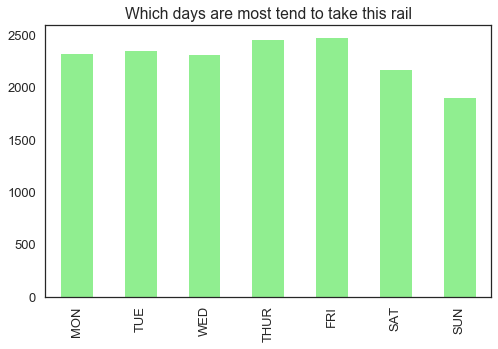

In [197]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Which days are most tend to take this rail")
result.plot(kind="bar", color = "lightgreen")
plt.show()

In [11]:
calendardates_df = pd.read_csv('calendar_dates.csv')
calendardates_df.head()

,﻿service_id,date,exception_type
0,TA+b000b,20161208,2
1,TA+b000f,20161201,2
2,TA+b000g,20161208,2
3,TA+b000n,20161208,2
4,TA+b000q,20161208,2


In [12]:
routes_df = pd.read_csv('routes.csv')
routes_df.head()

,﻿route_id,agency_id,route_short_name,route_long_name,route_type,route_color,route_text_color
0,11-21-j16-1,NaN,021,NaN,3,NaN,NaN
1,11-22-j16-1,NaN,022,NaN,3,NaN,NaN
2,16-22-j16-1,NaN,022,NaN,3,NaN,NaN
3,11-25-j16-1,NaN,025,NaN,3,NaN,NaN
4,11-41-j16-1,NaN,041,NaN,3,NaN,NaN


In [13]:
trips_df = pd.read_csv('trips.csv')
trips_df.head()

,﻿route_id,service_id,trip_id,trip_headsign,direction_id
0,1-1-A-j16-1,TA,224.TA.1-1-A-j16-1.9.H,Laufenburg,0
1,1-1-A-j16-1,TA,225.TA.1-1-A-j16-1.9.H,Laufenburg,0
2,1-1-A-j16-1,TA,226.TA.1-1-A-j16-1.9.H,Laufenburg,0
3,1-1-A-j16-1,TA,227.TA.1-1-A-j16-1.9.H,Laufenburg,0
4,1-1-A-j16-1,TA,228.TA.1-1-A-j16-1.9.H,Laufenburg,0


In [68]:
trips_df.tail()

,﻿route_id,service_id,trip_id,trip_headsign,direction_id
288920,80-96-Y-j16-1,TA+b0ict,1.TA.80-96-Y-j16-1.1.H,Neuchâtel,0
288921,80-96-Y-j16-1,TA+b0icu,4.TA.80-96-Y-j16-1.1.H,Neuchâtel,0
288922,80-96-Y-j16-1,TA+b0icv,7.TA.80-96-Y-j16-1.1.H,Neuchâtel,0
288923,90-5-Y-j16-1,TA+b0idd,33.TA.90-5-Y-j16-1.15.H,Treib,0
288924,90-5-Y-j16-1,TA+b0ide,34.TA.90-5-Y-j16-1.16.H,Luzern Bahnhofquai,0


In [66]:
trips_df5 = pd.read_csv('trips.csv')
trips_df5['trip_headsign'].value_counts()[:5]

Luzern, Bahnhof              2482
Zürich, Klusplatz            1815
Bern, Bahnhof                1654
Genève, Jardin Botanique     1622
Zürich Flughafen, Bahnhof    1498
Name: trip_headsign, dtype: int64

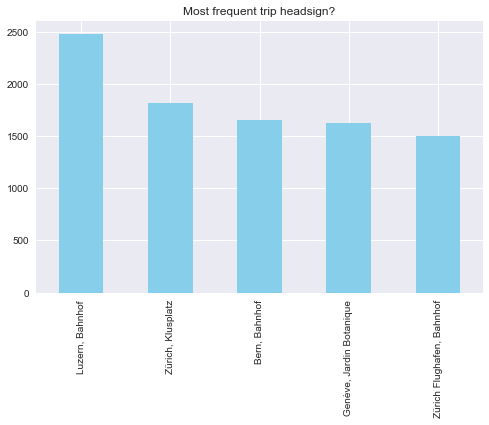

In [67]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Most frequent trip headsign?")
trips_df5['trip_headsign'].value_counts()[:5].plot(kind="bar", color = "skyblue")
plt.show()
